<a href="https://colab.research.google.com/github/Chanura04/Maths-CW/blob/main/20240955.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Modelling Travel Time

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import latex
from IPython.display import display, Math

In [ ]:
x=sp.symbols('x')
y=sp.symbols('y')
a=sp.symbols('a')
b=sp.symbols('b')
c=sp.symbols('c')
T=sp.symbols('∇T')

In [ ]:
T_b=a *( x**2) + b * (y**2)
print(f"T_b(x,y)= {latex(T_b)}")


T_b(x,y)= a x^{2} + b y^{2}


In [ ]:
T_t= sp.sqrt(c * (x **2 + y**2))
print("T_t(x,y)=",T_t)

T_t(x,y)= sqrt(c*(x**2 + y**2))


In [ ]:
diff_T_b_by_x=sp.diff(T_b,x)
print("Partial derivative of travelling time by bus ,with respect to x  \n")

print(f"∂T/∂x= {latex(diff_T_b_by_x)}")

Partial derivative of travelling time by bus ,with respect to x  

∂T/∂x= 2 a x


In [ ]:
diff_T_b_by_y=sp.diff(T_b,y)
print("Partial derivative of travelling time by bus ,with respect to y  \n")

print(f"∂T/∂y= {latex(diff_T_b_by_y)}")

Partial derivative of travelling time by bus ,with respect to y  

∂T/∂y= 2 b y


In [ ]:
#Calculate Gradient value for bus
gradient_latex = f"{T}_b =( {latex(diff_T_b_by_x)} , {latex(diff_T_b_by_y)})"
print(gradient_latex)

∇T_b =( 2 a x , 2 b y)


In [ ]:
diff_T_t_by_x=sp.diff(T_t,x)
print("Partial derivative of travelling time by taxi ,with respect to 𝑥  \n")
print(f"∂T/∂x= \n")
sp.simplify(diff_T_t_by_x)
#print(f"T_t_by_x= {diff_T_t_by_x}")

Partial derivative of travelling time by taxi ,with respect to 𝑥  

∂T/∂x= 



x*sqrt(c*(x**2 + y**2))/(x**2 + y**2)

In [ ]:
diff_T_t_by_y=sp.diff(T_t,y)
print("Partial derivative of travelling time by taxi ,with respect to y  \n")
print(f"∂T/∂y= \n")
sp.simplify(diff_T_t_by_y)
#print(f"T_t_by_y= {diff_T_t_by_y}")

Partial derivative of travelling time by taxi ,with respect to y  

∂T/∂y= 



y*sqrt(c*(x**2 + y**2))/(x**2 + y**2)

In [ ]:
#Calculate Gradient value for taxi
gradient_latex = f"\\nabla T_t = \\left( {latex(diff_T_t_by_x)},\\ {latex(diff_T_t_by_y)} \\right)"
display(Math(gradient_latex))

<IPython.core.display.Math object>

### Interpretation for bus travel time

In [ ]:
rate_for_bus=diff_T_b_by_x / diff_T_b_by_y
sp.simplify(rate_for_bus)


a*x/(b*y)

```
x = total route distance (in km)
```

```
y = traffic delay factor (in minutes per km)
```
```
• a reflects the effect of distance on bus travel time (stops, boarding times).
• b reflects the effect of congestion on bus travel time.
• c is a proportionality constant converting combined effects into minutes for taxis.
```

*   If a>>b , then distance x has a bigger impact.
*   If b>>a , then traffic delay factor y has bigger impact.

   
**For this situation x= 4.5km is fixed.**

For these factors, We assume each bus stop people are getting equal time to get into the bus.

     Conclusion:-

  *    Since the problem specifies that the bus route include multiple stops, both the stops related to delays and traffic delays contribute to the b. Therefor b represent the overall higher impact.



### Interpretation for taxi travel time

In [ ]:
rate_for_taxi=diff_T_t_by_x / diff_T_t_by_y
sp.pprint(rate_for_taxi)

x
─
y




*  According to result x and y has similar impact for the travel time. But in the problem distance has approximately fixed value. which is 4.5 km. However the only way for impact to travel time is variation of traffic delay.



## 2. Cost Analysis Using Integration

In [ ]:
t=sp.symbols('t')
bus_express= 2 * t + 1
taxi_express= 3 * t + 2


print(f"F_bus =>  ∫ ( {latex(bus_express)} )dt  , Limit 0 to x \n")
print(f"F_taxi =>  ∫ ( {latex(taxi_express)} )dt  , Limit 0 to x")

F_bus =>  ∫ ( 2 t + 1 )dt  , Limit 0 to x 

F_taxi =>  ∫ ( 3 t + 2 )dt  , Limit 0 to x


In [ ]:
f_bus=sp.integrate(bus_express,(t,0,x))
print(f"f_bus = {latex(f_bus)}")
# sp.simplify(f_bus)

f_bus = x^{2} + x


In [ ]:
f_taxi=sp.integrate(taxi_express,(t,0,x))
print(f"f_taxi = \n\n")
sp.simplify(f_taxi)

f_taxi = 




x*(3*x + 4)/2

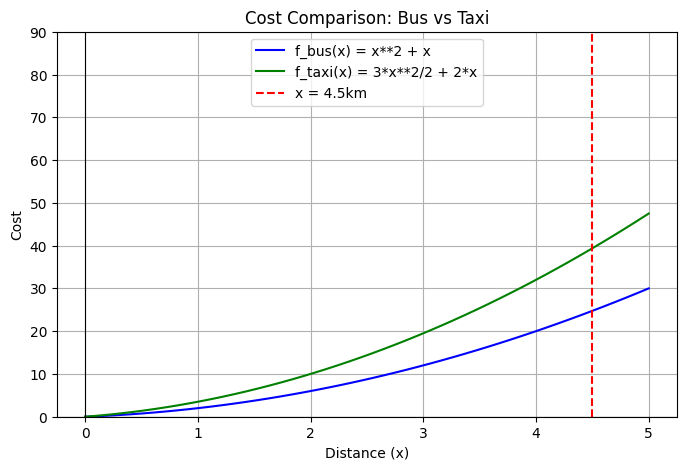

In [ ]:
x_vals = np.linspace(0, 5)

# Use sp.lambdify to convert symbolic expressions to numpy functions
f_bus_np = sp.lambdify(x, f_bus, "numpy")
f_taxi_np = sp.lambdify(x, f_taxi, "numpy")

y_vals_bus = f_bus_np(x_vals)
y_vals_taxi = f_taxi_np(x_vals)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals_bus, label=f"f_bus(x) = {f_bus}", color='blue')
plt.plot(x_vals, y_vals_taxi, label=f"f_taxi(x) = {f_taxi}", color='green')
plt.axvline(x=4.5, color='red', linestyle='--', linewidth=1.5, label='x = 4.5km')
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)
plt.ylim(0, 90)
plt.legend()

plt.grid(True)
plt.title("Cost Comparison: Bus vs Taxi")
plt.xlabel("Distance (x)")
plt.ylabel("Cost")
plt.show()

In [ ]:
simplified_expr=sp.simplify(f_taxi/f_bus)
quotient, remainder = sp.div(simplified_expr.as_numer_denom()[0], simplified_expr.as_numer_denom()[1], domain='QQ')

print(f"f_taxi / f_bus= {quotient} ")

f_taxi / f_bus= 3/2 


```
f_taxi = 1.5 * f_bus
```

Acorss both short and long-distance journeys, bus transporation proves to be more cost effective. because taxi cost fuction is uniformly 1.5 times greater than the corresponding bus cost fuction.